# **기본적인 EDA + 데이터 라벨링 진행하는 과정**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 구글 드라이브와 연결하기 
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
# 파일 가져오기 

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/neis_b10_highschool_food - neis_b10_highschool_food.csv") 

In [ ]:
# 데이터 확인 
df

,Unnamed: 0,food,menu
0,0,콩나물무밥&달래양념장,0
1,1,콩가루배추된장국,0
2,2,청포묵김가루무침,0
3,3,장각구이,0
4,4,깍두기,0
...,...,...,...
659866,659866,꼬들단무지무침,120217
659867,659867,순살닭떡찜&라면사리,120217
659868,659868,배추김치,120217
659869,659869,참치마요주먹밥,120217


In [ ]:
# 필요없는 칼럼 제거 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,food,menu
0,콩나물무밥&달래양념장,0
1,콩가루배추된장국,0
2,청포묵김가루무침,0
3,장각구이,0
4,깍두기,0
...,...,...
659866,꼬들단무지무침,120217
659867,순살닭떡찜&라면사리,120217
659868,배추김치,120217
659869,참치마요주먹밥,120217


In [ ]:
# 워드 라이브러리 

# 고기별 단어 리스트 정리하기 
beef = ['소고기','쇠고기','함박','불고기'] 
# 함박스테이크 제외? -> 함박스테이크, 함박스테이크소스 등.. 
pork = ['제육','돼지','돈육','돈갈비','목살','돈까스','두루치기','돈코츠','돈사태','고추장불고기','스팸','삼겹살']
chicken  = ['탄두리','치킨','닭','장각']
duck = ['오리','오리훈제'] #오리엔탈은 제외? 
fish = ['고등어','연어','생선','동태','오징어','새우','게','조개','굴','전복','홍합','참치','어묵','해물','가자미','멸치','주꾸미','쭈꾸미'] #굴소스 제외? 

In [ ]:
# 고기별 레이블 -> 원핫인코딩과 비슷하게 처리 

# 원핫인코딩을 안 쓴 이유? 이전처럼 'meat' 분류를 한 후 원핫인코딩을 하면 누락되는 경우가 있음
# 예: 주꾸미삼겹살 -> 처음 불류하면 주꾸미에 대해서만 1이 되고 이 상태로 원핫인코디을 하면 삼겹살이 들어갔다는 사실이 누락됨 

df['Beef'] = 0
df['Pork'] = 0
df['Chicken'] = 0
df['Duck'] = 0
df['Seafood'] = 0

df['Beef'][df.food.str.contains('|'.join(beef))] = 1
df['Pork'][df.food.str.contains('|'.join(pork))] = 1
df['Chicken'][df.food.str.contains('|'.join(chicken))] = 1
df['Duck'][df.food.str.contains('|'.join(duck))] = 1
df['Seafood'][df.food.str.contains('|'.join(fish))] = 1

df

In [ ]:
# 원핫인코딩식으로 라벨링 한 거 외에 오리지널 레이블 (0~5 까지 라벨링 )

df['meat_label'] = 0
df['meat_label'][df.food.str.contains('|'.join(beef))] = 1
df['meat_label'][df.food.str.contains('|'.join(pork))] = 2
df['meat_label'][df.food.str.contains('|'.join(chicken))] = 3
df['meat_label'][df.food.str.contains('|'.join(duck))] = 4
df['meat_label'][df.food.str.contains('|'.join(fish))] = 5
df


In [ ]:
# 라벨링이 진행된 데이터를 저장 
df.to_csv( "/content/drive/MyDrive/Colab Notebooks/cp2test4", index=False, encoding='utf-8-sig')

In [ ]:
# 확인 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test4") 
df

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
0,콩나물무밥&달래양념장,0,0,0,0,0,0,0
1,콩가루배추된장국,0,0,0,0,0,0,0
2,청포묵김가루무침,0,0,0,0,0,0,0
3,장각구이,0,0,0,1,0,0,3
4,깍두기,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
659866,꼬들단무지무침,120217,0,0,0,0,0,0
659867,순살닭떡찜&라면사리,120217,0,0,1,0,0,3
659868,배추김치,120217,0,0,0,0,0,0
659869,참치마요주먹밥,120217,0,0,0,0,1,5


In [ ]:
# 1만개 샘플링 후 

sampled = df.sample(10000)

In [ ]:
sampled = df

In [ ]:
def meat_encode(l: list):
  if sum(l) == 0:
    return np.insert(l, 0, 1)
  else:
    return np.insert(l, 0, 0)

In [ ]:
# ohe_meat 를 통해 중복 분류를 나타내기 (e.g. 쭈꾸미삼겹살)

sampled['ohe_meat'] = sampled.apply(lambda x: meat_encode([x.Beef, x.Pork, x.Chicken, x.Duck, x.Seafood]), axis=1)
sampled['codelist_meat'] = sampled["ohe_meat"].apply(lambda x: np.where(x == 1)[0])
sampled = sampled.explode('codelist_meat')

In [ ]:
sampled

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
0,콩나물무밥&달래양념장,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",0
1,콩가루배추된장국,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",0
2,청포묵김가루무침,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",0
3,장각구이,0,0,0,1,0,0,3,"[0, 0, 0, 1, 0, 0]",3
4,깍두기,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",0
...,...,...,...,...,...,...,...,...,...,...
659866,꼬들단무지무침,120217,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",0
659867,순살닭떡찜&라면사리,120217,0,0,1,0,0,3,"[0, 0, 0, 1, 0, 0]",3
659868,배추김치,120217,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",0
659869,참치마요주먹밥,120217,0,0,0,0,1,5,"[0, 0, 0, 0, 0, 1]",5


In [ ]:
sampled['food'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
659866     True
659867    False
659868     True
659869     True
659870     True
Name: food, Length: 664382, dtype: bool

In [ ]:
# 샘플링된 데이터를 저장 
sampled.to_csv( "/content/drive/MyDrive/Colab Notebooks/sampled", index=False, encoding='utf-8-sig')d

In [ ]:
# 다시 불러오기? 
sampled = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sampled") 

In [ ]:
sampled[sampled['food']=='쭈꾸미삼겹살']

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
10023,쭈꾸미삼겹살,1700,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",2
10023,쭈꾸미삼겹살,1700,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",5
123293,쭈꾸미삼겹살,22602,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",2
123293,쭈꾸미삼겹살,22602,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",5
123649,쭈꾸미삼겹살,22662,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",2
123649,쭈꾸미삼겹살,22662,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",5
162128,쭈꾸미삼겹살,29694,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",2
162128,쭈꾸미삼겹살,29694,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",5
486939,쭈꾸미삼겹살,88595,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",2
486939,쭈꾸미삼겹살,88595,0,1,0,0,1,5,"[0, 0, 1, 0, 0, 1]",5


In [ ]:
# 중복 데이터 제거 

import pandas as pd
new_sample = sampled.drop_duplicates(['food'],keep = 'first')

In [ ]:
df0 = new_sample

In [ ]:
df0[df0['food']=='쭈꾸미삼겹살']

In [ ]:
df0.to_csv("/content/drive/MyDrive/Colab Notebooks/cp2test7")

In [33]:
# 필요없는 칼럼 제거 

# 기존에 전처리 했던 데이터 불러오기 

# Beef ~ Seafood columns: 원핫 인코딩 
# Meat_label: 고기 종류가 라벨링 된 칼럼 
# ohe_meat: 다중 클래스에 해당되는 음식을 포함하기 위해 추가됨 
# codelist_meat: 다중 클래스에 해당되는 음식의 경우 두 개의 row 에 걸쳐서 반환- 예: 쭈꾸미삼겹살의 경우 codelist_meat = 1 , coselist_meat = 5 (해산물)

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test7") 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
0,콩나물무밥&달래양념장,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
1,콩가루배추된장국,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
2,청포묵김가루무침,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
3,장각구이,0,0,0,1,0,0,3,[0 0 0 1 0 0],3
4,깍두기,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
...,...,...,...,...,...,...,...,...,...,...
55141,씨리얼토스트,120204,0,0,0,0,0,0,[1 0 0 0 0 0],0
55142,매콤돈육볶음밥,120204,0,1,0,0,0,2,[0 0 1 0 0 0],2
55143,바베큐치킨&또띠아,120209,0,0,1,0,0,3,[0 0 0 1 0 0],3
55144,바삭야채튀김,120210,0,0,0,0,0,0,[1 0 0 0 0 0],0


In [ ]:
df['meat_label'].isin([0])

In [ ]:
# 라벨 0이 들어가는 데이터 따로 지정하기 

zero = df['meat_label'].isin([0])
dfz = df[zero]
dfz

In [ ]:
df['meat_label'].value_counts()

0    39007
5     6164
3     3963
2     2961
1     2100
4      951
Name: meat_label, dtype: int64

In [34]:
# 라벨 1~5에 해당하는 데이터만 남기기 
# 증폭 / 샘플링은 하지 않는다. 
# 1.6만개 

df = df[df.codelist_meat != 0]
df

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
3,장각구이,0,0,0,1,0,0,3,[0 0 0 1 0 0],3
8,쑥갓어묵국,1,0,0,0,0,1,5,[0 0 0 0 0 1],5
10,훈제오리숙주무침,1,0,0,0,1,0,4,[0 0 0 0 1 0],4
13,토마토스파게티,2,0,0,0,0,1,5,[0 0 0 0 0 1],5
18,쇠고기미역국,3,1,0,0,0,0,1,[0 1 0 0 0 0],1
...,...,...,...,...,...,...,...,...,...,...
55135,칠리떡새우강정,120189,0,0,0,0,1,5,[0 0 0 0 0 1],5
55140,고구마무스닭구이,120202,0,0,1,0,0,3,[0 0 0 1 0 0],3
55142,매콤돈육볶음밥,120204,0,1,0,0,0,2,[0 0 1 0 0 0],2
55143,바베큐치킨&또띠아,120209,0,0,1,0,0,3,[0 0 0 1 0 0],3


In [ ]:
# 0
zero = df['meat_label'].isin([0])
dfz = df[zero]
dfz


,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
0,콩나물무밥&달래양념장,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
1,콩가루배추된장국,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
2,청포묵김가루무침,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
4,깍두기,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
5,파인애플,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
...,...,...,...,...,...,...,...,...,...,...
55137,떡꼬치구이,120194,0,0,0,0,0,0,[1 0 0 0 0 0],0
55138,치즈킹,120194,0,0,0,0,0,0,[1 0 0 0 0 0],0
55139,두부브로콜리샐러드,120199,0,0,0,0,0,0,[1 0 0 0 0 0],0
55141,씨리얼토스트,120204,0,0,0,0,0,0,[1 0 0 0 0 0],0


In [28]:
# 1855 개의 누비랩 데이터 중에서 고기에 대해 라벨링이 된 데이터만 모아보기 
# 1855개 -> 595개 
# 이 데이터와 KoBERT 모델의 결과를 비교할 예정 

nuvi2

,요리명,고기
0,LA돼지갈비구이,1.0
1,가자미버터구이,5.0
2,가자미살양념조림,5.0
3,가자미살유린기&소스,5.0
4,가자미살칠리강정,5.0
...,...,...
590,후라이드치킨,3.0
591,훈제오리&머스터드,4.0
592,훈제오리겨자채,4.0
593,훈제오리김치볶음밥,4.0


누비푸드 데이터에 대한 EDA (모델 결과와 직접적인 비교를 위해) 

In [ ]:
# 1 누비푸드 돼지고기

pork = nuvi2['고기'].isin([1.0])
nuvi_1 = nuvi2[pork]
nuvi_1

In [31]:
# 2 누비푸드 소고기  

beef = nuvi2['고기'].isin([2.0])
nuvi_2 = nuvi2[beef]
nuvi_20 = nuvi_2.sample(10)
nuvi_20

,요리명,고기
475,차돌떡볶이,2.0
268,불고기김치전,2.0
241,버섯소불고기,2.0
303,새싹올린언양식불고기,2.0
395,언양너비아니&숙주파채,2.0
341,쇠고기샤브,2.0
547,피자함박스텍&소스,2.0
278,불고기포켓브레드,2.0
279,불고기플랫브레드,2.0
340,쇠고기버섯죽,2.0


In [32]:
# 3 누비푸드 닭고기  

chicken = nuvi2['고기'].isin([3.0])
nuvi_3 = nuvi2[chicken]
nuvi_30 = nuvi_3.sample(10)
nuvi_30

,요리명,고기
197,매콤달콤닭꼬치구이,3.0
513,치킨팔락파니르커리,3.0
97,닭봉고구마조림,3.0
236,반반치킨(깻잎),3.0
287,뿌링클치킨&치즈볼,3.0
77,닭감자찜(묵은지),3.0
504,치킨반마리오븐구이,3.0
377,스모크치킨구이,3.0
6,간장소스닭꼬치구이,3.0
532,탄두리닭살구이,3.0


In [33]:
# 4 누비푸드 오리고기  

duck = nuvi2['고기'].isin([4.0])
nuvi_4 = nuvi2[duck]
nuvi_40 = nuvi_4.sample(10)
nuvi_40

,요리명,고기
120,대패오리불고기,4.0
592,훈제오리겨자채,4.0
409,오리불고기,4.0
407,오리고기버섯볶음,4.0
408,오리구이,4.0
594,훈제오리채소볶음,4.0
73,단호박오리구이,4.0
411,"오리훈제,소스",4.0
593,훈제오리김치볶음밥,4.0
410,오리주물럭,4.0


In [34]:
# 5 누비푸드 물고기  

fish = nuvi2['고기'].isin([5.0])
nuvi_5 = nuvi2[fish]
nuvi_50 = nuvi_5.sample(10)
nuvi_50

,요리명,고기
32,골뱅이미역국수무침,5.0
415,오징어&브로콜리초회,5.0
444,잔멸치당근볶음,5.0
430,오징어치즈떡볶이,5.0
262,북어김치국,5.0
446,잔멸치주먹밥,5.0
187,랍스터구이,5.0
582,홍합무국,5.0
56,꿀대구구이,5.0
458,조갯살미역국,5.0


In [30]:
nuvi_10 = nuvi_1.sample(10)
nuvi_10

,요리명,고기
227,바베큐립구이,1.0
193,매실떡갈비구이,1.0
370,순대국밥&소면,1.0
16,감자품은떡갈비,1.0
249,베이컨김치전,1.0
134,돈육더덕두루치기,1.0
126,돈까스덮밥,1.0
163,돼지고기수육,1.0
214,목살와인구이,1.0
456,제육비빔밥&약고추장,1.0


In [ ]:
# 1 돼지고기 데이터 부스팅 

pork = df['meat_label'].isin([1])
df = df[pork]

# 돼지 데이터 부스팅  
df1= pd.concat([df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df])
df1

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
18,쇠고기미역국,3,1,0,0,0,0,1,[0 1 0 0 0 0],1
57,언양식바싹불고기,11,1,0,0,0,0,1,[0 1 0 0 0 0],1
427,불고기브리또,161,1,0,0,0,0,1,[0 1 0 0 0 0],1
430,정통함박스테이크,162,1,0,0,0,0,1,[0 1 0 0 0 0],1
436,쇠고기버섯수제비국,166,1,0,0,0,0,1,[0 1 0 0 0 0],1
...,...,...,...,...,...,...,...,...,...,...
55018,소고기찹쌀육전,119671,1,0,0,0,0,1,[0 1 0 0 0 0],1
55027,불고기말이,119681,1,0,0,0,0,1,[0 1 0 0 0 0],1
55031,먹물비엔나포테이토함박,119684,1,0,0,0,0,1,[0 1 0 0 0 0],1
55079,함박버거,119836,1,0,0,0,0,1,[0 1 0 0 0 0],1


In [ ]:
# 2 소고기 데이터 부스팅 

# 필요없는 칼럼 제거 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test7") 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

beef = df['meat_label'].isin([2])
df = df[beef]

# 소고기 데이터 부스팅  
df2= pd.concat([df,df,df,df,df,df,df,df,df,df,df,df,df])
df2

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
20,통등심돈까스,3,0,1,0,0,0,2,[0 0 1 0 0 0],2
53,통마늘고추장불고기,10,1,1,0,0,0,2,[0 1 1 0 0 0],1
74,파채돈육불고기,15,1,1,0,0,0,2,[0 1 1 0 0 0],1
81,돼지갈비찜,17,0,1,0,0,0,2,[0 0 1 0 0 0],2
85,돈코츠라멘,18,0,1,0,0,0,2,[0 0 1 0 0 0],2
...,...,...,...,...,...,...,...,...,...,...
55101,목살김치볶음밥,120041,0,1,0,0,0,2,[0 0 1 0 0 0],2
55121,간장돼지고기구이,120158,0,1,0,0,0,2,[0 0 1 0 0 0],2
55128,돼지갈비구이소스,120178,0,1,0,0,0,2,[0 0 1 0 0 0],2
55129,돈육간장구이,120178,0,1,0,0,0,2,[0 0 1 0 0 0],2


In [ ]:
# 3 닭고기 데이터 부스팅 

# 필요없는 칼럼 제거 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test7") 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

chicken = df['meat_label'].isin([3])
df = df[chicken]

# 닭고기 데이터  부스팅 
df3= pd.concat([df,df,df,df,df,df,df,df,df,df])
df3

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
3,장각구이,0,0,0,1,0,0,3,[0 0 0 1 0 0],3
38,찜닭,6,0,0,1,0,0,3,[0 0 0 1 0 0],3
48,불닭,9,0,0,1,0,0,3,[0 0 0 1 0 0],3
62,닭갈비,12,0,0,1,0,0,3,[0 0 0 1 0 0],3
77,닭곰탕,16,0,0,1,0,0,3,[0 0 0 1 0 0],3
...,...,...,...,...,...,...,...,...,...,...
55108,프링글고추마요치킨,120065,0,0,1,0,0,3,[0 0 0 1 0 0],3
55131,치킨텐더&어니언,120183,0,0,1,0,0,3,[0 0 0 1 0 0],3
55140,고구마무스닭구이,120202,0,0,1,0,0,3,[0 0 0 1 0 0],3
55143,바베큐치킨&또띠아,120209,0,0,1,0,0,3,[0 0 0 1 0 0],3


In [ ]:
# 4 오리고기 데이터 부스팅 

# 필요없는 칼럼 제거 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test7") 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

duck = df['meat_label'].isin([4])
df = df[duck]

# 오리 데이터 부스팅  
df4= pd.concat([df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df])
df4

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
10,훈제오리숙주무침,1,0,0,0,1,0,4,[0 0 0 0 1 0],4
28,대패오리불고기,4,1,0,0,1,0,4,[0 1 0 0 1 0],1
79,치커리오리엔탈무침,16,0,0,0,1,0,4,[0 0 0 0 1 0],4
244,훈제오리&머스터드,82,0,0,0,1,0,4,[0 0 0 0 1 0],4
330,오리지널,119,0,0,0,1,0,4,[0 0 0 0 1 0],4
...,...,...,...,...,...,...,...,...,...,...
54883,펜네오리엔탈샐러드,119331,0,0,0,1,0,4,[0 0 0 0 1 0],4
54920,회오리감자튀김★,119417,0,0,0,1,0,4,[0 0 0 0 1 0],4
54973,숯불오리불고기&무쌈,119596,1,0,0,1,0,4,[0 1 0 0 1 0],1
54984,숯불오리주물럭&깻잎무쌈,119627,0,0,0,1,0,4,[0 0 0 0 1 0],4


In [ ]:
# 해산물은 이미 데이터가 많아서 따로 부스팅은 하지 않았음. 


# 필요없는 칼럼 제거 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test7") 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


fish = df['meat_label'].isin([5])
df5 = df[fish]

df5= pd.concat([df5,df5,df5,df5,df5,df5])
df5

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
8,쑥갓어묵국,1,0,0,0,0,1,5,[0 0 0 0 0 1],5
13,토마토스파게티,2,0,0,0,0,1,5,[0 0 0 0 0 1],5
59,오징어콩나물국,12,0,0,0,0,1,5,[0 0 0 0 0 1],5
72,참치김치찌개,15,0,0,0,0,1,5,[0 0 0 0 0 1],5
75,사각어묵볶음,15,0,0,0,0,1,5,[0 0 0 0 0 1],5
...,...,...,...,...,...,...,...,...,...,...
55110,치즈새우김치볶음밥,120069,0,0,0,0,1,5,[0 0 0 0 0 1],5
55113,생선까스&치즈소스,120076,0,0,0,0,1,5,[0 0 0 0 0 1],5
55120,어묵무고추장무침,120114,0,0,0,0,1,5,[0 0 0 0 0 1],5
55123,어묵전&머스타드,120160,0,0,0,0,1,5,[0 0 0 0 0 1],5


In [ ]:
# 부스팅된 데이터들을 합치기 
df_comb =pd.concat([dfz,df1,df2,df3,df4,df5])
df_comb

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
0,콩나물무밥&달래양념장,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
1,콩가루배추된장국,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
2,청포묵김가루무침,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
4,깍두기,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
5,파인애플,0,0,0,0,0,0,0,[1 0 0 0 0 0],0
...,...,...,...,...,...,...,...,...,...,...
55110,치즈새우김치볶음밥,120069,0,0,0,0,1,5,[0 0 0 0 0 1],5
55113,생선까스&치즈소스,120076,0,0,0,0,1,5,[0 0 0 0 0 1],5
55120,어묵무고추장무침,120114,0,0,0,0,1,5,[0 0 0 0 0 1],5
55123,어묵전&머스타드,120160,0,0,0,0,1,5,[0 0 0 0 0 1],5


In [ ]:
# 부스팅된 데이터들을 합치기 
df_comb2 =pd.concat([df1,df2,df3,df4,df5])
df_comb2 = df_comb2.sample(10000)
df_comb2['meat_label'].value_counts()

1    2103
3    2023
4    2008
2    1945
5    1921
Name: meat_label, dtype: int64

In [ ]:
df_comb = df_comb.sample(10000)
df_comb['meat_label'].value_counts()

1    1722
2    1666
4    1659
0    1654
3    1653
5    1646
Name: meat_label, dtype: int64

In [ ]:
df_comb.to_csv("/content/drive/MyDrive/Colab Notebooks/df_comb.csv")

In [ ]:
df_comb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/df_comb.csv") 
df_comb = df_comb.loc[:, ~df_comb.columns.str.contains('^Unnamed')]
df_comb

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
0,떡갈비&오리엔탈무침,93855,0,0,0,1,0,4,[0 0 0 0 1 0],4
1,공심채굴소스볶음,52258,0,0,0,0,1,5,[0 0 0 0 0 1],5
2,훈제돈육&소스,72852,0,1,0,0,0,2,[0 0 1 0 0 0],2
3,마늘칩닭봉구이_,90260,0,0,1,0,0,3,[0 0 0 1 0 0],3
4,◎케이준양념감자,90951,0,0,0,0,0,0,[1 0 0 0 0 0],0
...,...,...,...,...,...,...,...,...,...,...
9995,쇠고기두부양념조림,29032,1,0,0,0,0,1,[0 1 0 0 0 0],1
9996,매콤연탄불고기만두,62977,1,0,0,0,0,1,[0 1 0 0 0 0],1
9997,닭짬뽕국,58126,0,0,1,0,0,3,[0 0 0 1 0 0],3
9998,고추장닭볶음,27549,0,0,1,0,0,3,[0 0 0 1 0 0],3


In [ ]:
# df_comb 가지고 모델 돌려보기???

In [ ]:
data_list = []
for q, label in zip(df_comb['food'], df_comb['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
data_list

[['떡갈비&오리엔탈무침', '4'],
 ['공심채굴소스볶음', '5'],
 ['훈제돈육&소스', '2'],
 ['마늘칩닭봉구이_', '3'],
 ['◎케이준양념감자', '0'],
 ['돈육알감자엿장조림', '2'],
 ['미니그릴함박&소스', '1'],
 ['수제닭다리튀김&머스터드', '3'],
 ['부추돼지고기볶음', '2'],
 ['두부샐러드오리엔탈', '4'],
 ['오븐닭구이', '3'],
 ['알배추제육볶음', '2'],
 ['참나물유자무침', '0'],
 ['쇠고기야채죽', '1'],
 ['크림조랭이떡볶이', '0'],
 ['새우까스&탈탈소스', '5'],
 ['오리훈제머스타드소스', '4'],
 ['고등어구이', '5'],
 ['해물라면', '5'],
 ['로메인오리엔탈무침', '4'],
 ['우불고기당면볶음', '1'],
 ['삼겹목살구이', '2'],
 ['메리화이트숯불닭꼬치', '3'],
 ['앵그리어묵국', '5'],
 ['데리야끼닭볶음', '3'],
 ['오꼬노미프리타타', '0'],
 ['치즈돈까스&양파카레소스', '2'],
 ['소고기콩나물밥&부추장', '1'],
 ['일삭토스트', '0'],
 ['피자함박', '1'],
 ['깍두기볶음밥석', '0'],
 ['오징어바샐러드', '5'],
 ['순살찜닭_당면', '3'],
 ['불낙죽_', '0'],
 ['참치채소무침모닝빵', '5'],
 ['콩나물불고기&오이스틱', '1'],
 ['깐쇼새우&칠리소스', '5'],
 ['한방돼지갈비떡찜', '2'],
 ['돼지고추장찌개', '2'],
 ['해물버섯전', '5'],
 ['민물새우시래기지짐', '5'],
 ['참치감자조림', '5'],
 ['쇠고기마라국', '1'],
 ['치킨볼강정', '3'],
 ['오리엔탈그린샐러드', '4'],
 ['안심커리치킨', '3'],
 ['후르츠링&요거트', '0'],
 ['가지돼지고기볶음', '2'],
 ['미니스팸마요덮밥', '2'],
 ['생닭봉구이소스따로', '3'],
 ['그린샐러드생딸기', '0'

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/469 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.6211291551589966 train acc 0.3125
epoch 1 batch id 201 loss 0.05817078426480293 train acc 0.7646144278606966
epoch 1 batch id 401 loss 0.01712922379374504 train acc 0.8654925187032418
epoch 1 train acc 0.8820628997867804


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 1 test acc 0.981687898089172


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.3018171787261963 train acc 0.9375
epoch 2 batch id 201 loss 0.007705896161496639 train acc 0.9819651741293532
epoch 2 batch id 401 loss 0.00648260535672307 train acc 0.9841022443890274
epoch 2 train acc 0.9852078891257996


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 2 test acc 0.9872611464968153


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.004606241825968027 train acc 1.0
epoch 3 batch id 201 loss 0.003766166279092431 train acc 0.9878731343283582
epoch 3 batch id 401 loss 0.0037126680836081505 train acc 0.9906483790523691
epoch 3 train acc 0.9917377398720683


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 3 test acc 0.9940286624203821


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.0025611885357648134 train acc 1.0
epoch 4 batch id 201 loss 0.0031748651526868343 train acc 0.9937810945273632
epoch 4 batch id 401 loss 0.0019325863104313612 train acc 0.994856608478803
epoch 4 train acc 0.9954690831556503


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 4 test acc 0.9956210191082803


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.002678945427760482 train acc 1.0
epoch 5 batch id 201 loss 0.0025494778528809547 train acc 0.9959577114427861
epoch 5 batch id 401 loss 0.002000086009502411 train acc 0.9964152119700748
epoch 5 train acc 0.9968017057569296


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 5 test acc 0.9964171974522293


In [ ]:
# 중복 데이터를 제거한 데이터의 클래스 불균형이 있나 확인 
df0['meat_label'].value_counts()

0    39007
5     6164
3     3963
2     2961
1     2100
4      951
Name: meat_label, dtype: int64

In [ ]:
# 중복 데이터 제거 후 한 메뉴에 여러가지 고기를 가지고 있는 메뉴들까지 포함하여 불균형 유무 확인 
df0['codelist_meat'].value_counts()

0    39007
5     5800
3     4049
2     2944
1     2538
4      808
Name: codelist_meat, dtype: int64

In [ ]:
# 66만개 데이터의 라벨링 분포 확인 
sampled['codelist_meat'].value_counts()

0    547257
5     42161
3     25516
2     24750
1     18839
4      5859
Name: codelist_meat, dtype: int64

In [ ]:
nuvi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of nuvi_foods.csv") 

In [ ]:
nuvi['고기']

,pk,기관명,요리명,에너지 (kcal),대분류,중분류,고기,중복식재료,색감,맛,조리방법,주영양소
0,29996.0,서울방화초등학교,수리취떡,98.52,5.0,19.0,NaN,NaN,2.0,6.0,NaN,1.0
1,4845.0,서울노원초등학교,10곡미숫가루,199,5.0,20.0,NaN,NaN,4.0,6.0,NaN,1.0
2,25735.0,서울묘곡초등학교,4색야채피클,21.19,3.0,11.0,NaN,NaN,NaN,4.0,NaN,1.0
3,11892.0,다대중학교,BR아이스크림,150.63,5.0,21.0,NaN,NaN,NaN,1.0,NaN,3.0
4,17714.0,영성중학교,DOLE쥬스,62.21,5.0,20.0,NaN,NaN,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1853,10269.0,다대중학교,흔들도시락,32.59,1.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0
1854,24197.0,서울방화초등학교,흰떡무국,4.61,2.0,3.0,NaN,NaN,5.0,NaN,NaN,1.0
1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nuvi0 = nuvi[['요리명','고기']]
nuvi1 = nuvi0.dropna()
nuvi1

,요리명,고기
5,LA돼지갈비구이,1.0
10,가자미버터구이,5.0
11,가자미살양념조림,5.0
12,가자미살유린기&소스,5.0
13,가자미살칠리강정,5.0
...,...,...
1837,후라이드치킨,3.0
1843,훈제오리&머스터드,4.0
1844,훈제오리겨자채,4.0
1845,훈제오리김치볶음밥,4.0


In [ ]:
nuvi2 = nuvi1[['요리명']]
array2 = nuvi2.to_numpy()
array2

In [ ]:
array = nuvi1.to_numpy() 
array

array([['LA돼지갈비구이', 1.0],
       ['가자미버터구이', 5.0],
       ['가자미살양념조림', 5.0],
       ...,
       ['훈제오리겨자채', 4.0],
       ['훈제오리김치볶음밥', 4.0],
       ['훈제오리채소볶음', 4.0]], dtype=object)

In [ ]:
nuvi1.to_csv("/content/drive/MyDrive/Colab Notebooks/nuvi_fin.csv")

In [23]:
nuvi2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nuvi_fin.csv") 

In [26]:
nuvi2 = nuvi2.loc[:, ~nuvi2.columns.str.contains('^Unnamed')]
nuvi2


,요리명,고기
0,LA돼지갈비구이,1.0
1,가자미버터구이,5.0
2,가자미살양념조림,5.0
3,가자미살유린기&소스,5.0
4,가자미살칠리강정,5.0
...,...,...
590,후라이드치킨,3.0
591,훈제오리&머스터드,4.0
592,훈제오리겨자채,4.0
593,훈제오리김치볶음밥,4.0


In [ ]:
# put the meat values into an array 
import numpy as np 
arr = np.array(nuvi1.select('고기').collect())

# ***KoBERT 로 토큰화 후 모델링 진행하기***

In [ ]:
# Kobert 이용이 안 될 때 먼저 설ㅊ티할 것
!pip install boto3==1.17.39 

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master


In [9]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [10]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [11]:
#GPU 사용
device = torch.device("cuda:0")
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_v1.zip
using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


# **Case # 1** - 다른 레이블링 기준으로 해보기 (Ohe_meat array) ; 일단 에러가 떠서 넘김

In [ ]:
data_list = []
for q, label in zip(sampled['food'], sampled['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
data_list

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


NameError: ignored

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

# **Case # 2** - 기존 레이블링 기준 (1~5) 

In [ ]:
data_list = []
for q, label in zip(sampled['food'], sampled['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [ ]:
print(len(dataset_train))
print(len(dataset_test))

7565
2522


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2,  980, 6016, 6738, 7682, 5503,    3,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(7, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
train_dataloader

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/119 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.7296922206878662 train acc 0.125
epoch 1 train acc 0.7879666289592759


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/40 [00:00<?, ?it/s]

epoch 1 test acc 0.9498197115384615


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.15219351649284363 train acc 0.96875
epoch 2 train acc 0.9767695539754363


  0%|          | 0/40 [00:00<?, ?it/s]

epoch 2 test acc 0.9921875


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.014749670401215553 train acc 1.0
epoch 3 train acc 0.9957983193277311


  0%|          | 0/40 [00:00<?, ?it/s]

epoch 3 test acc 0.99921875


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.005549389403313398 train acc 1.0
epoch 4 train acc 0.9993434873949579


  0%|          | 0/40 [00:00<?, ?it/s]

epoch 4 test acc 0.998046875


  0%|          | 0/119 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.0038538353983312845 train acc 1.0
epoch 5 train acc 0.9994747899159664


  0%|          | 0/40 [00:00<?, ?it/s]

epoch 5 test acc 0.998046875


# **Case 3 - Nuvi_Foods 데이터를 테스트 데이터로 설정**

In [ ]:
# nuvi_foods 데이터로 모델 실험? 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nuvi_foods.csv") 


In [ ]:
# 결측치 채우기 & 결과 확인 
df = df.fillna(0)
df['food'].isna()

In [ ]:
# 혹시나 한글로 EDA를 했을 때 매끄럽지 않을 수 있기 때문에 칼럼명 변경 
df.rename(columns = {'요리명':'food'}, inplace = True)

In [ ]:
# '고기' 칼럼에 대한 라벨링 진행 
df['고기'] = 0
df['고기'][df.food.str.contains('|'.join(beef),na= False)] = 1
df['고기'][df.food.str.contains('|'.join(pork),na= False)] = 2
df['고기'][df.food.str.contains('|'.join(chicken),na= False)] = 3
df['고기'][df.food.str.contains('|'.join(duck),na= False)] = 4
df['고기'][df.food.str.contains('|'.join(fish),na= False)] = 5
df


In [ ]:
df

,pk,기관명,food,에너지 (kcal),대분류,중분류,고기,중복식재료,색감,맛,조리방법,주영양소
0,29996.0,서울방화초등학교,수리취떡,98.52,5.0,19.0,0,0.0,2.0,6.0,0.0,1.0
1,4845.0,서울노원초등학교,10곡미숫가루,199,5.0,20.0,0,0.0,4.0,6.0,0.0,1.0
2,25735.0,서울묘곡초등학교,4색야채피클,21.19,3.0,11.0,0,0.0,0.0,4.0,0.0,1.0
3,11892.0,다대중학교,BR아이스크림,150.63,5.0,21.0,0,0.0,0.0,1.0,0.0,3.0
4,17714.0,영성중학교,DOLE쥬스,62.21,5.0,20.0,0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1853,10269.0,다대중학교,흔들도시락,32.59,1.0,2.0,0,0.0,0.0,0.0,0.0,3.0
1854,24197.0,서울방화초등학교,흰떡무국,4.61,2.0,3.0,0,0.0,5.0,0.0,0.0,1.0
1855,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1856,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 전처리된 Nuvi_Foods 저장  
df.to_csv( "/content/drive/MyDrive/Colab Notebooks/test12345.csv", index=False, encoding='utf-8-sig')

In [ ]:
# 전처리된 Nuvi_Foods 불러오기 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test12345.csv") 

In [ ]:
data_list = []
for q, label in zip(df['food'], df['고기'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
# Nuvi_Foods 데이터를 테스트 데이터로 지정 
from sklearn.model_selection import train_test_split                                                       
dataset_test0 = data_list
print(len(dataset_test0))

1858


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters

max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화

tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test0, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_test[0]

(array([   2, 2872, 6122, 7476, 5970,    3,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(6, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# **5월 24일 미팅 후 내용**

In [ ]:
# 전처리 후 라벨링의 분포 확인 -> Class Imbalance 존재하나? 

# 전체적으로 0 과 0이 아닌것들의 불균형이 존재함 
# 0 미분류
# 1 돼지
# 2 소 
# 3 닭
# 4 오리
# 5 해산물 

# Imbalance 를 해결하는 방법 -> 데이터를 증폭시킨다? 
# 5 외에 3 2 1 4 를 약 4만개 정도로 맞추기??  < - 인위적으로 데이터를 더하기? 
# 숫자 적은 애들 -> 토큰들 리스트를 무작위로 조합 -> 토큰 전체세트를 만들고 , itertools 파이썬, 콤비네이션, 그 다음에 모으고 다시 돌려보기? 

# 증폭하는 방법 1번 : 고기들끼리만 증폭하기 : 4만개씩 맞추기 
# 증폭하는 방법 2번 : 고기들끼리 증폭하고 0도 4만개로 샘플해서 합치기? 
# 증폭하는 방법 3번 : 고기들 증폭해서 0개 개수만큼 맞추기 -> 데이터가 수백만개가 된다? 이건 너무 많지 않나? 

df['meat_label'].value_counts()

0    547257
5     42161
3     25260
2     23933
1     15435
4      5825
Name: meat_label, dtype: int64

# **고기로 라벨링된 데이터들을 증폭 후 증폭된 데이터들끼리 묶어서 모델링 진행** 

In [ ]:
# 1 소고기 데이터 부스팅 

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test4") 

pork = df['meat_label'].isin([1])
df = df[pork]

# 소고기 복사 후 
df2 = df 
df2
df = df.sample(9000)

# 소고기 데이터 부스팅  
df1= pd.concat([df,df,df2,df])
df1

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
522675,바싹불고기&파채,94587,1,0,0,0,0,1
235183,소고기버섯매운탕,43250,1,0,0,0,0,1
538097,함박&크림소스,97564,1,0,0,0,0,1
505920,언양식불고기&파채,91740,1,0,0,0,0,1
305181,소불고기피자,55797,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4633,쇠고기계란장조림,778,1,0,0,0,0,1
628175,쇠고기무국,114140,1,0,0,0,0,1
479384,반달불고기,87067,1,0,0,0,0,1
165473,고구마함박,30325,1,0,0,0,0,1


In [ ]:
# 2 돼지고기 데이터 부스팅 

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test4") 

beef = df['meat_label'].isin([2])
df = df[beef]

# 돼지고기 복사 후 
df2 = df 
df2
df = df.sample(9000)

# 돼지고기 
df2= pd.concat([df2,df,df])
df2

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
22,통등심돈까스,3,0,1,0,0,0,2
54,통등심돈까스,8,0,1,0,0,0,2
70,통마늘고추장불고기,10,1,1,0,0,0,2
98,파채돈육불고기,15,1,1,0,0,0,2
109,돼지갈비찜,17,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...
264512,돈코츠라멘,48445,0,1,0,0,0,2
577138,돈육김치찌개,104736,0,1,0,0,0,2
141550,돼지불고기,26048,1,1,0,0,0,2
598145,제육볶음,108660,0,1,0,0,0,2


In [ ]:
# 3 닭고기 데이터 부스팅 

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test4") 

chicken = df['meat_label'].isin([3])
df = df[chicken]

# 닭고기 복사 후 
df2 = df 
df2
df = df.sample(8500)

# 닭고기 데이터  부스팅 
df3= pd.concat([df2,df,df])
df3

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
3,장각구이,0,0,0,1,0,0,3
43,찜닭,6,0,0,1,0,0,3
62,불닭,9,0,0,1,0,0,3
82,닭갈비,12,0,0,1,0,0,3
102,닭곰탕,16,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...
583018,매콤닭구이,105744,0,0,1,0,0,3
39012,닭살볶음,6717,0,0,1,0,0,3
145654,순살파닭,26836,0,0,1,0,0,3
4202,춘천닭갈비,709,0,0,1,0,0,3


In [ ]:
# 4 오리고기 데이터 부스팅 

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test4") 

duck = df['meat_label'].isin([4])
df = df[duck]

# 오리 복사 후 
df2 = df 
df2
df = df.sample(2050)

# 오리 데이터 부스팅  
df4= pd.concat([df,df2,df,df2,df,df,df,df,df,df2,df,df,df,df,df])
df4

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
264128,오리주물럭,48382,0,0,0,1,0,4
238229,훈제오리구이,43816,0,0,0,1,0,4
556091,간장오리불고기,100857,1,0,0,1,0,4
77065,숯불맛오리불고기무쌈,14248,1,0,0,1,0,4
421673,수제오리떡갈비,76700,0,0,0,1,0,4
...,...,...,...,...,...,...,...,...
364258,오리훈제구이소스,66300,0,0,0,1,0,4
305929,회오리감자시즈닝,55910,0,0,0,1,0,4
400121,훈제오리채소구이,72983,0,0,0,1,0,4
38754,직화오리불고기,6677,1,0,0,1,0,4


In [ ]:
# 해산물은 이미 데이터가 많아서 따로 부스팅은 하지 않았음. 

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cp2test4") 

fish = df['meat_label'].isin([5])
df5 = df[fish]
df5

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
8,쑥갓어묵국,1,0,0,0,0,1,5
13,토마토스파게티,2,0,0,0,0,1,5
79,오징어콩나물국,12,0,0,0,0,1,5
96,참치김치찌개,15,0,0,0,0,1,5
99,사각어묵볶음,15,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...
659771,찹쌀콩멸치볶음,120202,0,0,0,0,1,5
659781,꼬지어묵우동,120204,0,0,0,0,1,5
659784,새우튀김,120204,0,0,0,0,1,5
659830,해물파전,120211,0,0,0,0,1,5


In [ ]:
# 부스팅된 데이터들을 합치기 
df_comb =pd.concat([df1,df2,df3,df4,df5])
df_comb

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
522675,바싹불고기&파채,94587,1,0,0,0,0,1
235183,소고기버섯매운탕,43250,1,0,0,0,0,1
538097,함박&크림소스,97564,1,0,0,0,0,1
505920,언양식불고기&파채,91740,1,0,0,0,0,1
305181,소불고기피자,55797,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
659771,찹쌀콩멸치볶음,120202,0,0,0,0,1,5
659781,꼬지어묵우동,120204,0,0,0,0,1,5
659784,새우튀김,120204,0,0,0,0,1,5
659830,해물파전,120211,0,0,0,0,1,5


In [ ]:
data_list = []
for q, label in zip(df_comb['food'], df_comb['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
# 모델을 돌리는데 시간이 너무 오래 걸려서 종료 후 데이터 점검 
df_small = df_comb.sample(10000)
df_small['meat_label'].value_counts()

3    2040
2    2040
4    2008
1    1984
5    1928
Name: meat_label, dtype: int64

In [ ]:
# 모델 다시 돌리기 

data_list = []
for q, label in zip(df_small['food'], df_small['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/469 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 2.089310646057129 train acc 0.0625
epoch 1 batch id 201 loss 0.020849043503403664 train acc 0.8081467661691543
epoch 1 batch id 401 loss 0.010069129057228565 train acc 0.898067331670823
epoch 1 train acc 0.9105810234541578


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 1 test acc 0.9924363057324841


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.004849583841860294 train acc 1.0
epoch 2 batch id 201 loss 0.0020878217183053493 train acc 0.9975124378109452
epoch 2 batch id 401 loss 0.0027969717048108578 train acc 0.9967269326683291
epoch 2 train acc 0.9968017057569296


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 2 test acc 0.9980095541401274


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.0019751430954784155 train acc 1.0
epoch 3 batch id 201 loss 0.0013490080600604415 train acc 0.9984452736318408
epoch 3 batch id 401 loss 0.0009434876847080886 train acc 0.9987531172069826
epoch 3 train acc 0.9985341151385928


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 3 test acc 1.0


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.001356881344690919 train acc 1.0
epoch 4 batch id 201 loss 0.0006832914659753442 train acc 0.9975124378109452
epoch 4 batch id 401 loss 0.0006987806991674006 train acc 0.9985972568578554
epoch 4 train acc 0.9986673773987207


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 4 test acc 0.9992038216560509


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.0005966626340523362 train acc 1.0
epoch 5 batch id 201 loss 0.0006016972474753857 train acc 0.9993781094527363
epoch 5 batch id 401 loss 0.000578463776037097 train acc 0.9995324189526185
epoch 5 train acc 0.9996002132196162


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 5 test acc 0.9996019108280255


##**0 으로 라벨링된 데이터를 돌려보기** (0 으로 학습 후 0 에 대해서 테스트?) 

In [ ]:
# 0 으로 된 데이터들만 남겨두기 
newmask = df['meat_label'].isin([1,2,3,4,5])
df = df[~newmask]
df

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
0,콩나물무밥&달래양념장,0,0,0,0,0,0,0
1,콩가루배추된장국,0,0,0,0,0,0,0
2,청포묵김가루무침,0,0,0,0,0,0,0
4,깍두기,0,0,0,0,0,0,0
5,파인애플,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
659864,아이스망고스틱,120216,0,0,0,0,0,0
659865,유부팽이된장국,120217,0,0,0,0,0,0
659866,꼬들단무지무침,120217,0,0,0,0,0,0
659868,배추김치,120217,0,0,0,0,0,0


In [ ]:
sampled = df 

In [ ]:
data_list = []
for q, label in zip(sampled['food'], sampled['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [ ]:
print(len(dataset_train))
print(len(dataset_test))

410442
136815


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/25653 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.6573213338851929 train acc 0.3125
epoch 1 batch id 201 loss 1.5268018245697021 train acc 0.3149875621890547
epoch 1 batch id 401 loss 0.7852584719657898 train acc 0.5291458852867831
epoch 1 batch id 601 loss 0.10724515467882156 train acc 0.6824043261231281
epoch 1 batch id 801 loss 0.018601158633828163 train acc 0.7613920099875156
epoch 1 batch id 1001 loss 0.008259650319814682 train acc 0.8090659340659341
epoch 1 batch id 1201 loss 0.004740523640066385 train acc 0.8408617818484596
epoch 1 batch id 1401 loss 0.0027385216671973467 train acc 0.8635795860099929
epoch 1 batch id 1601 loss 0.0018348314333707094 train acc 0.8806214865708932
epoch 1 batch id 1801 loss 0.00158247712533921 train acc 0.8938784008883953
epoch 1 batch id 2001 loss 0.000957825337536633 train acc 0.9044852573713144
epoch 1 batch id 2201 loss 0.0007953148451633751 train acc 0.9131644706951386
epoch 1 batch id 2401 loss 0.0006930999807082117 train acc 0.9203977509371095
epoch 1 batch id 2601 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/8551 [00:00<?, ?it/s]

epoch 1 test acc 1.0


  0%|          | 0/25653 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.0 train acc 1.0
epoch 2 batch id 201 loss 0.0 train acc 1.0
epoch 2 batch id 401 loss 0.0 train acc 1.0
epoch 2 batch id 601 loss 0.0 train acc 1.0
epoch 2 batch id 801 loss 0.0 train acc 1.0
epoch 2 batch id 1001 loss 0.0 train acc 1.0
epoch 2 batch id 1201 loss 0.0 train acc 1.0
epoch 2 batch id 1401 loss 0.0 train acc 1.0
epoch 2 batch id 1601 loss 0.0 train acc 1.0
epoch 2 batch id 1801 loss 0.0 train acc 1.0


# **0을 제외한 데이터들을 돌려보기** (라벨 1~5 까지의 것들) 

In [ ]:
# 레이블이 0 인 데이터들은 제외 
# 분류가 된 라벨 11만개는 확인 가능하다 
# BERT 관련 코드는 일부 생략함 (너무 반복 돼서)

mask = df['meat_label'].isin([0])
df = df[~mask]
df

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label
3,장각구이,0,0,0,1,0,0,3
8,쑥갓어묵국,1,0,0,0,0,1,5
10,훈제오리숙주무침,1,0,0,0,1,0,4
13,토마토스파게티,2,0,0,0,0,1,5
20,쇠고기미역국,3,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
659841,파채불고기,120213,1,0,0,0,0,1
659848,닭봉조림,120214,0,0,1,0,0,3
659862,용가리치킨너겟,120216,0,0,1,0,0,3
659867,순살닭떡찜&라면사리,120217,0,0,1,0,0,3


In [ ]:
sampled = df 

In [ ]:
data_list = []
for q, label in zip(sampled['food'], sampled['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/5279 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.7482845783233643 train acc 0.3125
epoch 1 batch id 201 loss 1.5497117042541504 train acc 0.27798507462686567
epoch 1 batch id 401 loss 0.70721435546875 train acc 0.4019638403990025
epoch 1 batch id 601 loss 0.23909296095371246 train acc 0.5813227953410982
epoch 1 batch id 801 loss 0.020015208050608635 train acc 0.6828183520599251
epoch 1 batch id 1001 loss 0.01133352518081665 train acc 0.7442557442557443
epoch 1 batch id 1201 loss 0.004294434562325478 train acc 0.7855432972522898
epoch 1 batch id 1401 loss 0.0026396175380796194 train acc 0.8153104925053534
epoch 1 batch id 1601 loss 0.49360179901123047 train acc 0.837523422860712
epoch 1 batch id 1801 loss 0.002797994762659073 train acc 0.8550805108273182
epoch 1 batch id 2001 loss 0.0008400523220188916 train acc 0.8688780609695153
epoch 1 batch id 2201 loss 0.0007408243254758418 train acc 0.8804520672421626
epoch 1 batch id 2401 loss 0.0027545923367142677 train acc 0.8900197834235735
epoch 1 batch id 2601 los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1760 [00:00<?, ?it/s]

epoch 1 test acc 0.9989701704545455


  0%|          | 0/5279 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.0002635293349158019 train acc 1.0
epoch 2 batch id 201 loss 0.0005184502224437892 train acc 0.9984452736318408
epoch 2 batch id 401 loss 0.0012209106935188174 train acc 0.9971945137157108
epoch 2 batch id 601 loss 0.0003693372127600014 train acc 0.9972961730449251
epoch 2 batch id 801 loss 0.00024251766444649547 train acc 0.9971910112359551
epoch 2 batch id 1001 loss 0.0006757450173608959 train acc 0.9972527472527473


KeyboardInterrupt: ignored

In [ ]:
# Install Category Encoders 

pip install category_encoders

     |████████████████████████████████| 80 kB 7.4 MB/s 


In [ ]:
# One Hot Encoding 

from category_encoders import OneHotEncoder 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



# **One Hot Encoding 이나 멀티 레이블링 해보기 - One Hot 부터. **




In [ ]:
df

,food,menu
0,콩나물무밥&달래양념장,0
1,콩가루배추된장국,0
2,청포묵김가루무침,0
3,장각구이,0
4,깍두기,0
...,...,...
659866,꼬들단무지무침,120217
659867,순살닭떡찜&라면사리,120217
659868,배추김치,120217
659869,참치마요주먹밥,120217


In [ ]:
df['meat'] = str(df['meat'])

In [ ]:
df0 = df 

In [ ]:
df1 = df ## import OneHotEncoder
from category_encoders import OneHotEncoder

## 원핫 인코딩
#encoder = OneHotEncoder(use_cat_names = True)
encoder = OneHotEncoder(cols = ['meat'], use_cat_names = False)
df1 = encoder.fit_transform(df1)
df1

# meat 1 = None 
# meat 2 = 닭고기 
# meat 3 = 해산물 
# meat 4 = 오리 
# meat 5 = 소고기  
# meat 6 = 돼지 

# 원핫 해주고 다시 레이블링? -> 왜? -> 일부는 쭈꾸미로만 되어 있기 때문에? 
# 밑에는 df1임? 

,food,menu,meat_1,meat_2,meat_3,meat_4,meat_5,meat_6
0,콩나물무밥&달래양념장,0,1,0,0,0,0,0
1,콩가루배추된장국,0,1,0,0,0,0,0
2,청포묵김가루무침,0,1,0,0,0,0,0
3,장각구이,0,0,1,0,0,0,0
4,깍두기,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
659866,꼬들단무지무침,120217,1,0,0,0,0,0
659867,순살닭떡찜&라면사리,120217,0,1,0,0,0,0
659868,배추김치,120217,1,0,0,0,0,0
659869,참치마요주먹밥,120217,0,0,1,0,0,0


In [ ]:
# 오리지널 레이블 

df0['meat_label'] = 0
df0['meat_label'][df.food.str.contains('|'.join(beef))] = 1
df0['meat_label'][df.food.str.contains('|'.join(pork))] = 2
df0['meat_label'][df.food.str.contains('|'.join(chicken))] = 3
df0['meat_label'][df.food.str.contains('|'.join(duck))] = 4
df0['meat_label'][df.food.str.contains('|'.join(fish))] = 5
df0


In [ ]:
df1.to_csv( "/content/drive/MyDrive/Colab Notebooks/cp2test2", index=False, encoding='utf-8-sig')

In [ ]:
df1 = df ## import OneHotEncoder
from category_encoders import OneHotEncoder

## 원핫 인코딩
#encoder = OneHotEncoder(use_cat_names = True)
encoder = OneHotEncoder(cols = ['meat_label'], use_cat_names = False)
df1 = encoder.fit_transform(df1)
df1

,food,menu,meat_label_1,meat_label_2,meat_label_3,meat_label_4,meat_label_5,meat_label_6
0,콩나물무밥&달래양념장,0,1,0,0,0,0,0
1,콩가루배추된장국,0,1,0,0,0,0,0
2,청포묵김가루무침,0,1,0,0,0,0,0
3,장각구이,0,0,1,0,0,0,0
4,깍두기,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
659866,꼬들단무지무침,120217,1,0,0,0,0,0
659867,순살닭떡찜&라면사리,120217,0,1,0,0,0,0
659868,배추김치,120217,1,0,0,0,0,0
659869,참치마요주먹밥,120217,0,0,1,0,0,0


In [ ]:
## import OneHotEncoder
from category_encoders import OneHotEncoder

## 원핫 인코딩
#encoder = OneHotEncoder(use_cat_names = True)
encoder = OneHotEncoder(cols = ['meat_label'], use_cat_names = True)
df0 = encoder.fit_transform(df0)

In [ ]:
encoder

OneHotEncoder(cols=['meat_label'], use_cat_names=True)

In [ ]:
#rename the columns? 

In [ ]:
df0 = df 

In [ ]:
df.to_csv( "/content/drive/MyDrive/Colab Notebooks/cp2test1", index=False, encoding='utf-8-sig')

In [ ]:
df

,food,menu,food_label,meat_label
0,콩나물무밥&달래양념장,0,0,0
1,콩가루배추된장국,0,0,0
2,청포묵김가루무침,0,0,0
3,장각구이,0,0,3
4,깍두기,0,0,0
...,...,...,...,...
659866,꼬들단무지무침,120217,0,0
659867,순살닭떡찜&라면사리,120217,3,3
659868,배추김치,120217,0,0
659869,참치마요주먹밥,120217,5,5


In [ ]:
df_comb

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
47961,떡갈비&오리엔탈무침,93855,0,0,0,1,0,4,[0 0 0 0 1 0],4
32958,공심채굴소스볶음,52258,0,0,0,0,1,5,[0 0 0 0 0 1],5
41006,훈제돈육&소스,72852,0,1,0,0,0,2,[0 0 1 0 0 0],2
46514,마늘칩닭봉구이_,90260,0,0,1,0,0,3,[0 0 0 1 0 0],3
46754,◎케이준양념감자,90951,0,0,0,0,0,0,[1 0 0 0 0 0],0
...,...,...,...,...,...,...,...,...,...,...
23234,쇠고기두부양념조림,29032,1,0,0,0,0,1,[0 1 0 0 0 0],1
37169,매콤연탄불고기만두,62977,1,0,0,0,0,1,[0 1 0 0 0 0],1
34938,닭짬뽕국,58126,0,0,1,0,0,3,[0 0 0 1 0 0],3
22238,고추장닭볶음,27549,0,0,1,0,0,3,[0 0 0 1 0 0],3


In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/473 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.9026240110397339 train acc 0.125
epoch 1 batch id 201 loss 0.37980926036834717 train acc 0.7459577114427861
epoch 1 batch id 401 loss 0.6448444724082947 train acc 0.8301122194513716
epoch 1 train acc 0.8479834119369003


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/117 [00:00<?, ?it/s]

epoch 1 test acc 0.9599358974358975


  0%|          | 0/473 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.0507965050637722 train acc 1.0
epoch 2 batch id 201 loss 0.039831098169088364 train acc 0.9505597014925373
epoch 2 batch id 401 loss 0.3844248652458191 train acc 0.9611907730673317
epoch 2 train acc 0.9632358920149617


  0%|          | 0/117 [00:00<?, ?it/s]

epoch 2 test acc 0.9711538461538461


  0%|          | 0/473 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.02429354563355446 train acc 1.0
epoch 3 batch id 201 loss 0.009183790534734726 train acc 0.986318407960199
epoch 3 batch id 401 loss 0.0036015890073031187 train acc 0.9886221945137157
epoch 3 train acc 0.9895308180191901


  0%|          | 0/117 [00:00<?, ?it/s]

epoch 3 test acc 0.9898504273504274


  0%|          | 0/473 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.00794265978038311 train acc 1.0
epoch 4 batch id 201 loss 0.004752070177346468 train acc 0.9959577114427861
epoch 4 batch id 401 loss 0.0037491859402507544 train acc 0.9947007481296758
epoch 4 train acc 0.9949483655879005


  0%|          | 0/117 [00:00<?, ?it/s]

epoch 4 test acc 0.9925213675213675


  0%|          | 0/473 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.003782596904784441 train acc 1.0
epoch 5 batch id 201 loss 0.006859730463474989 train acc 0.9975124378109452
epoch 5 batch id 401 loss 0.0018112353282049298 train acc 0.9970386533665836
epoch 5 train acc 0.9969608879492601


  0%|          | 0/117 [00:00<?, ?it/s]

epoch 5 test acc 0.9909188034188035


In [ ]:
data_list = []
for q, label in zip(df_comb['food'], df_comb['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [ ]:
print(len(dataset_train))
print(len(dataset_test))

7500
2500


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2, 1815, 6745, 5866, 5591, 6664,  519, 1730, 5591, 6664, 6607,
        6664,    3,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(13, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 2)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/469 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.7959718704223633 train acc 0.1875
epoch 1 batch id 201 loss 0.5675002932548523 train acc 0.40360696517412936
epoch 1 batch id 401 loss 0.20896974205970764 train acc 0.6779925187032418
epoch 1 train acc 0.7221481876332623


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 1 test acc 0.9892515923566879


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.01200956478714943 train acc 1.0
epoch 2 batch id 201 loss 0.025550026446580887 train acc 0.9881840796019901
epoch 2 batch id 401 loss 0.0013898315373808146 train acc 0.9917394014962594
epoch 2 train acc 0.9922707889125799


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 2 test acc 0.9968152866242038


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.001714537967927754 train acc 1.0
epoch 3 batch id 201 loss 0.001482987543568015 train acc 0.9928482587064676
epoch 3 batch id 401 loss 0.0008432776667177677 train acc 0.9951683291770573
epoch 3 train acc 0.9957356076759062


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 3 test acc 0.9980095541401274


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.0010281683644279838 train acc 1.0
epoch 4 batch id 201 loss 0.0009456721018068492 train acc 0.9981343283582089
epoch 4 batch id 401 loss 0.0006395638920366764 train acc 0.9987531172069826
epoch 4 train acc 0.9989339019189766


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 4 test acc 0.9984076433121019


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.0005325199454091489 train acc 1.0
epoch 5 batch id 201 loss 0.0007240246050059795 train acc 0.9996890547263682
epoch 5 batch id 401 loss 0.0005576439434662461 train acc 0.9998441396508728
epoch 5 train acc 0.9998667377398721


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 5 test acc 0.9992038216560509


In [ ]:
df_comb2

In [ ]:
data_list = []
for q, label in zip(df_comb2['food'], df_comb2['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [ ]:
print(len(dataset_train))
print(len(dataset_test))

7500
2500


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2,  517, 6624, 5439, 5561, 6853, 6621, 7096, 7287,    3,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(10, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 1)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/469 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 2.1483516693115234 train acc 0.0
epoch 1 batch id 201 loss 0.019572485238313675 train acc 0.8103233830845771
epoch 1 batch id 401 loss 0.004073664546012878 train acc 0.9046134663341646
epoch 1 train acc 0.9176439232409381


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 1 test acc 0.9960191082802548


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.0041222237050533295 train acc 1.0
epoch 2 batch id 201 loss 0.002313867211341858 train acc 0.9950248756218906
epoch 2 batch id 401 loss 0.0019140400690957904 train acc 0.9964152119700748
epoch 2 train acc 0.9966684434968017


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 2 test acc 0.9964171974522293


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.001482893363572657 train acc 1.0
epoch 3 batch id 201 loss 0.0010906761744990945 train acc 0.9984452736318408
epoch 3 batch id 401 loss 0.0006193405133672059 train acc 0.9987531172069826
epoch 3 train acc 0.9989339019189766


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 3 test acc 0.9980095541401274


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.000634998083114624 train acc 1.0
epoch 4 batch id 201 loss 0.0005815685726702213 train acc 0.9984452736318408
epoch 4 batch id 401 loss 0.0006174240261316299 train acc 0.9992206982543641
epoch 4 train acc 0.9993336886993603


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 4 test acc 0.9984076433121019


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.0005805523251183331 train acc 1.0
epoch 5 batch id 201 loss 0.0005328534753061831 train acc 0.9993781094527363
epoch 5 batch id 401 loss 0.0005808126297779381 train acc 0.9995324189526185
epoch 5 train acc 0.9994669509594882


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 5 test acc 0.9984076433121019


In [ ]:
# EDA 처리된 Nuvi_Foods 불러오기 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test12345.csv") 

In [ ]:
df

In [ ]:
data_list = []
for q, label in zip(df['food'], df['고기'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
# Nuvi_Foods 데이터를 테스트 데이터로 지정 
from sklearn.model_selection import train_test_split                                                       
dataset_test0 = data_list
print(len(dataset_test0))

1858


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2,  517, 6624, 5439, 5561, 6853, 6621, 7096, 7287,    3,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(10, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 1)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/469 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.816528081893921 train acc 0.125
epoch 1 batch id 201 loss 0.015758145600557327 train acc 0.8311567164179104
epoch 1 batch id 401 loss 0.004104915075004101 train acc 0.9142768079800498
epoch 1 train acc 0.9261727078891258


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 1 test acc 0.9976114649681529


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.0026000645011663437 train acc 1.0
epoch 2 batch id 201 loss 0.0042136963456869125 train acc 0.9978233830845771
epoch 2 batch id 401 loss 0.0011297882301732898 train acc 0.9976620947630923
epoch 2 train acc 0.997867803837953


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 2 test acc 0.9992038216560509


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.00107663928065449 train acc 1.0
epoch 3 batch id 201 loss 0.0006722980178892612 train acc 0.9996890547263682
epoch 3 batch id 401 loss 0.0006715161143802106 train acc 0.9995324189526185
epoch 3 train acc 0.9996002132196162


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 3 test acc 0.9996019108280255


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.0006458330317400396 train acc 1.0
epoch 4 batch id 201 loss 0.0005442049005068839 train acc 1.0
epoch 4 batch id 401 loss 0.00045043916907161474 train acc 1.0
epoch 4 train acc 1.0


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 4 test acc 0.9992038216560509


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.000401299970690161 train acc 1.0
epoch 5 batch id 201 loss 0.0006456263363361359 train acc 1.0
epoch 5 batch id 401 loss 0.000555919948965311 train acc 1.0
epoch 5 train acc 1.0


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 5 test acc 0.9992038216560509


In [ ]:
data_list = []
for q, label in zip(df['food'], df['meat_label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [ ]:
print(len(dataset_train))
print(len(dataset_test))

7500
2500


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2,  517, 6624, 5439, 5561, 6853, 6621, 7096, 7287,    3,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(10, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 1)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# **최종 모델 # 1** 
## **라벨 1~5 까지만 모으기**

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/469 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 2.1483516693115234 train acc 0.0
epoch 1 batch id 201 loss 0.019572485238313675 train acc 0.8103233830845771
epoch 1 batch id 401 loss 0.004073664546012878 train acc 0.9046134663341646
epoch 1 train acc 0.9176439232409381


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 1 test acc 0.9960191082802548


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.0041222237050533295 train acc 1.0
epoch 2 batch id 201 loss 0.002313867211341858 train acc 0.9950248756218906
epoch 2 batch id 401 loss 0.0019140400690957904 train acc 0.9964152119700748
epoch 2 train acc 0.9966684434968017


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 2 test acc 0.9964171974522293


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.001482893363572657 train acc 1.0
epoch 3 batch id 201 loss 0.0010906761744990945 train acc 0.9984452736318408
epoch 3 batch id 401 loss 0.0006193405133672059 train acc 0.9987531172069826
epoch 3 train acc 0.9989339019189766


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 3 test acc 0.9980095541401274


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.000634998083114624 train acc 1.0
epoch 4 batch id 201 loss 0.0005815685726702213 train acc 0.9984452736318408
epoch 4 batch id 401 loss 0.0006174240261316299 train acc 0.9992206982543641
epoch 4 train acc 0.9993336886993603


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 4 test acc 0.9984076433121019


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.0005805523251183331 train acc 1.0
epoch 5 batch id 201 loss 0.0005328534753061831 train acc 0.9993781094527363
epoch 5 batch id 401 loss 0.0005808126297779381 train acc 0.9995324189526185
epoch 5 train acc 0.9994669509594882


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 5 test acc 0.9984076433121019


In [3]:
df_comb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/df_comb.csv") 
df_comb = df_comb.loc[:, ~df_comb.columns.str.contains('^Unnamed')]
df_comb

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
0,떡갈비&오리엔탈무침,93855,0,0,0,1,0,4,[0 0 0 0 1 0],4
1,공심채굴소스볶음,52258,0,0,0,0,1,5,[0 0 0 0 0 1],5
2,훈제돈육&소스,72852,0,1,0,0,0,2,[0 0 1 0 0 0],2
3,마늘칩닭봉구이_,90260,0,0,1,0,0,3,[0 0 0 1 0 0],3
4,◎케이준양념감자,90951,0,0,0,0,0,0,[1 0 0 0 0 0],0
...,...,...,...,...,...,...,...,...,...,...
9995,쇠고기두부양념조림,29032,1,0,0,0,0,1,[0 1 0 0 0 0],1
9996,매콤연탄불고기만두,62977,1,0,0,0,0,1,[0 1 0 0 0 0],1
9997,닭짬뽕국,58126,0,0,1,0,0,3,[0 0 0 1 0 0],3
9998,고추장닭볶음,27549,0,0,1,0,0,3,[0 0 0 1 0 0],3


In [13]:
data_list = []
for q, label in zip(df_comb['food'], df_comb['codelist_meat'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [14]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

In [15]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [16]:
# Setting parameters
max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 4
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [17]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [18]:
data_train[0]

(array([   2, 2186, 6754, 6865, 6853, 6730, 6424, 5439, 5561, 6964, 6122,
        6909, 7591,  517,  365, 2207, 5793,    3,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(18, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 1)

In [19]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [20]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

# **최종모델 # 2** 
# **중복데이터 제거 후 0~5 까지 라벨링 된 데이터에 대한 모델**

In [22]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/469 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.7539869546890259 train acc 0.1875
epoch 1 batch id 201 loss 0.7247004508972168 train acc 0.35012437810945274
epoch 1 batch id 401 loss 0.07118749618530273 train acc 0.6346633416458853
epoch 1 train acc 0.6843905472636816


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 1 test acc 0.9808917197452229


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.010780604556202888 train acc 1.0
epoch 2 batch id 201 loss 0.007634672801941633 train acc 0.9788557213930348
epoch 2 batch id 401 loss 0.0027235059533268213 train acc 0.9848815461346634
epoch 2 train acc 0.9865405117270789


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 2 test acc 0.9964171974522293


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.002714732429012656 train acc 1.0
epoch 3 batch id 201 loss 0.001454098615795374 train acc 0.9953358208955224
epoch 3 batch id 401 loss 0.0015019839629530907 train acc 0.9964152119700748
epoch 3 train acc 0.9964019189765458


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 3 test acc 0.9968152866242038


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.0011575688840821385 train acc 1.0
epoch 4 batch id 201 loss 0.0010328401112928987 train acc 0.9981343283582089
epoch 4 batch id 401 loss 0.0012833864893764257 train acc 0.9989089775561097
epoch 4 train acc 0.9990671641791045


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 4 test acc 0.9976114649681529


In [35]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

def predict(predict_meat):

    data = [predict_meat, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 0:
                test_eval.append("아무것도 안")
            elif np.argmax(logits) == 1:
                test_eval.append("소고기가")
            elif np.argmax(logits) == 2:
                test_eval.append("돼지고기가")
            elif np.argmax(logits) == 3:
                test_eval.append("닭고기가")
            elif np.argmax(logits) == 4:
                test_eval.append("오리고기가")
            elif np.argmax(logits) == 5:
                test_eval.append("해산물이")

        print("> " + test_eval[0] + " 들어간 메뉴입니다.")

using cached model. /content/drive/MyDrive/Colab Notebooks/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [36]:
end = 1
while end == 1 :
    food = input("메뉴 이름을 입력하세요 : ")
    if food == 0 :
        break
    predict(food)
    print("\n")

메뉴 이름을 입력하세요 : 바베큐립구이


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


> 아무것도 안 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 매실떡갈비구이
> 아무것도 안 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 숙대국밥&소면
> 아무것도 안 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 감자품은떡갈비
> 아무것도 안 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 베이컨김치전
> 아무것도 안 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 독육더덕두루치기
> 돼지고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 돈까스덮밥
> 돼지고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 돼지고기수육
> 돼지고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 목살와인구이
> 돼지고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 제육비빔밥&약고추장
> 돼지고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 차돌떡볶이
> 아무것도 안 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 불고기김치전
> 소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 버섯소불고기
> 소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 새싹올린언양식불고기
> 소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 언양너비아니&숙주파채
> 아무것도 안 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 쇠고기샤브
> 소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 피자함박스텍&소스
> 소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 불고기포켓브레드 
> 소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 불고기플랫브레드
> 소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 쇠고기버섯죽
> 소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 반반치킨
> 닭고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 뿌링클치킨
> 닭고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 탄두리닭살구이
> 닭고기가 들어간 메뉴입니다.


메뉴 이름을 입력

KeyboardInterrupt: ignored

In [ ]:
end = 1
while end == 1 :
    food = input("메뉴 이름을 입력하세요 : ")
    if food == 0 :
        break
    predict(food)
    print("\n")

메뉴 이름을 입력하세요 : 오리로스구이


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


오리고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 새우튀김
해산물이 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 장각구이
닭고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 쑥갓어묵국
해산물이 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 통등심돈까스
소고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 찜닭
닭고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 소고기미역국
돼지고기가 들어간 메뉴입니다.


메뉴 이름을 입력하세요 : 0
해산물이 들어간 메뉴입니다.




KeyboardInterrupt: ignored

In [37]:
df_comb

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
0,떡갈비&오리엔탈무침,93855,0,0,0,1,0,4,[0 0 0 0 1 0],4
1,공심채굴소스볶음,52258,0,0,0,0,1,5,[0 0 0 0 0 1],5
2,훈제돈육&소스,72852,0,1,0,0,0,2,[0 0 1 0 0 0],2
3,마늘칩닭봉구이_,90260,0,0,1,0,0,3,[0 0 0 1 0 0],3
4,◎케이준양념감자,90951,0,0,0,0,0,0,[1 0 0 0 0 0],0
...,...,...,...,...,...,...,...,...,...,...
9995,쇠고기두부양념조림,29032,1,0,0,0,0,1,[0 1 0 0 0 0],1
9996,매콤연탄불고기만두,62977,1,0,0,0,0,1,[0 1 0 0 0 0],1
9997,닭짬뽕국,58126,0,0,1,0,0,3,[0 0 0 1 0 0],3
9998,고추장닭볶음,27549,0,0,1,0,0,3,[0 0 0 1 0 0],3


In [40]:
df

,food,menu,Beef,Pork,Chicken,Duck,Seafood,meat_label,ohe_meat,codelist_meat
3,장각구이,0,0,0,1,0,0,3,[0 0 0 1 0 0],3
8,쑥갓어묵국,1,0,0,0,0,1,5,[0 0 0 0 0 1],5
10,훈제오리숙주무침,1,0,0,0,1,0,4,[0 0 0 0 1 0],4
13,토마토스파게티,2,0,0,0,0,1,5,[0 0 0 0 0 1],5
18,쇠고기미역국,3,1,0,0,0,0,1,[0 1 0 0 0 0],1
...,...,...,...,...,...,...,...,...,...,...
55135,칠리떡새우강정,120189,0,0,0,0,1,5,[0 0 0 0 0 1],5
55140,고구마무스닭구이,120202,0,0,1,0,0,3,[0 0 0 1 0 0],3
55142,매콤돈육볶음밥,120204,0,1,0,0,0,2,[0 0 1 0 0 0],2
55143,바베큐치킨&또띠아,120209,0,0,1,0,0,3,[0 0 0 1 0 0],3


In [36]:
cmt = df

In [ ]:
cmt

In [41]:
def create_n(table):
    # final 이라는 list에 단어들을 추출해서 담을 예정
    final=[]
    for i in range(table.shape[0]):
        list_n=kkma.nouns(table['food'][i])
        final=final+list_n
    return final

In [ ]:
food

In [ ]:
food = create_n(cmt)
food

In [ ]:
# 추출된 단어를 count해주는 함수
def getNounCnt(post_list):
    noun_cnt = {}
    
    for noun in post_list:
        if noun_cnt.get(noun):
            noun_cnt[noun] +=1
        else:
            noun_cnt[noun] = 1
    return noun_cnt
 
food_dict = getNounCnt(food)
# series 형태로 변환
food_series = pd.Series(food_dict)
# 2번이상 언급된 단어들만 
food_cnt=dict(zip(food_series[food_series>=2].index.tolist(), food_series[food_series>=2].values.tolist()))


In [ ]:
sorted(food_cnt)

In [ ]:
food_cnt

In [ ]:
from collections import Counter
# 일반 음식 중 

counter_goal = Counter(food_cnt)
counter_goal .most_common(10)

[('오리', 1147),
 ('볶음', 979),
 ('불고기', 972),
 ('소스', 911),
 ('구이', 731),
 ('훈제', 666),
 ('치킨', 617),
 ('닭', 575),
 ('샐러드', 520),
 ('치즈', 447)]

In [48]:
from collections import Counter
# 일반 음식 중 

counter_food = Counter(food_cnt)
counter_food .most_common(10)

[('오리', 1147),
 ('볶음', 979),
 ('불고기', 972),
 ('소스', 911),
 ('구이', 731),
 ('훈제', 666),
 ('치킨', 617),
 ('닭', 575),
 ('샐러드', 520),
 ('치즈', 447)]

In [ ]:
# 고기 중 많이 쓰인 건? 

In [ ]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8

In [ ]:
from google.colab import files
file_uploaded = files.upload()


Saving iconpp.png to iconpp.png


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# 웹사이트에서 iconpp.png라는 파일을 다운받아 분석 환경에 미리 upload 해줍니다.
icon=Image.open('iconpp.png').convert('RGBA')
mask = Image.new("RGBA", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


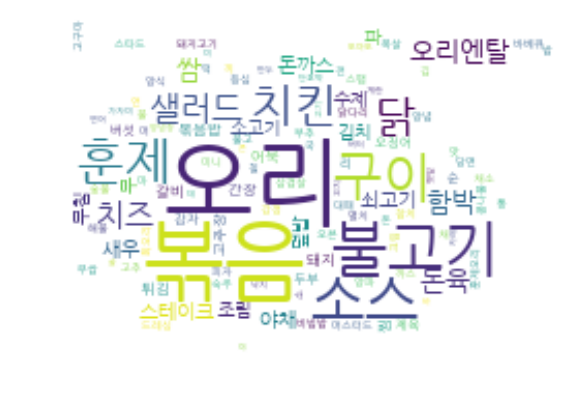

In [ ]:
!pip3 install wordcloud
from wordcloud import WordCloud
 
wc = WordCloud(font_path='NanumGothic.ttf',                           #폰트
               background_color='white',                              #배경색
               width=400, height=600,                                 #사이즈설정
               max_words=200                                          #단어갯수
                ,mask = mask
              )                                                       #마스크설정   
 
cloud = wc.generate_from_frequencies(food_cnt)                      #사전형태의 데이터
 
plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")


In [5]:
df = df_comb 

In [8]:
from konlpy.tag import Kkma
kkma = Kkma()
import pandas as pd

In [9]:
cmt = df

In [10]:
def create_n(table):
    # final 이라는 list에 단어들을 추출해서 담을 예정
    final=[]
    for i in range(table.shape[0]):
        list_n=kkma.nouns(table['food'][i])
        final=final+list_n
    return final

In [ ]:
food = create_n(cmt)
food

In [12]:
# 추출된 단어를 count해주는 함수
def getNounCnt(post_list):
    noun_cnt = {}
    
    for noun in post_list:
        if noun_cnt.get(noun):
            noun_cnt[noun] +=1
        else:
            noun_cnt[noun] = 1
    return noun_cnt
 
food_dict = getNounCnt(food)
# series 형태로 변환
food_series = pd.Series(food_dict)
# 2번이상 언급된 단어들만 
food_cnt=dict(zip(food_series[food_series>=2].index.tolist(), food_series[food_series>=2].values.tolist()))


In [ ]:
sorted(food_cnt)

In [19]:
# 음식 카운터 

from collections import Counter

counter_goal = Counter(food_cnt)
counter_goal .most_common(10)

[('오리', 1147),
 ('볶음', 979),
 ('불고기', 972),
 ('소스', 911),
 ('구이', 731),
 ('훈제', 666),
 ('치킨', 617),
 ('닭', 575),
 ('샐러드', 520),
 ('치즈', 447)]

In [15]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8

In [28]:
from google.colab import files
file_uploaded = files.upload()


Saving iconpp.png to iconpp.png


In [30]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# 웹사이트에서 iconpp.png라는 파일을 다운받아 분석 환경에 미리 upload 해줍니다.
icon=Image.open('iconpp.png').convert('RGBA')
mask = Image.new("RGBA", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


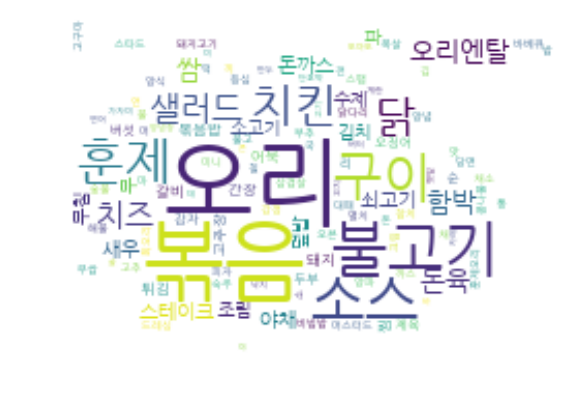

In [32]:
!pip3 install wordcloud
from wordcloud import WordCloud
 
wc = WordCloud(font_path='NanumGothic.ttf',                           #폰트
               background_color='white',                              #배경색
               width=400, height=600,                                 #사이즈설정
               max_words=200                                          #단어갯수
                ,mask = mask
              )                                                       #마스크설정   
 
cloud = wc.generate_from_frequencies(food_cnt)                      #사전형태의 데이터
 
plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")


In [ ]:
!pip3 install wordcloud
from wordcloud import WordCloud
 
wc = WordCloud(font_path='NanumGothic.ttf',                           #폰트
               background_color='white',                              #배경색
               width=400, height=600,                                 #사이즈설정
               max_words=200                                          #단어갯수
                ,mask = mask
              )                                                       #마스크설정   
 
cloud = wc.generate_from_frequencies(food_cnt)                      #사전형태의 데이터
 
plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")


In [73]:
counter_goal = Counter(food_cnt)
counter_goal .most_common(10)

[('오리', 1147),
 ('볶음', 979),
 ('불고기', 972),
 ('소스', 911),
 ('구이', 731),
 ('훈제', 666),
 ('치킨', 617),
 ('닭', 575),
 ('샐러드', 520),
 ('치즈', 447)]

In [4]:
from sklearn.metrics import f1_score
from sklearn.multioutput import MultiOutputClassifier

# multilabel classification
y_true = [[1,1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1]]
y_pred = [[0,0,0,0,0,1,1,1,1,1], [0,0,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1,1],[0,0,1,1,1,1,1,1,1,1],[0,0,0,0,1,1,1,1,1,1]]
f1_score(y_true, y_pred, average=None)


array([0.33333333, 0.33333333, 0.75      , 0.75      , 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ])

# **KoNLPy를 이용한 분석 (진행하면서 계속 오류가 발생하고 디버깅에 시간이 너무 소요돼서 중지...)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.toarray())


[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
clf = ak.TextClassifier(
    num_classes=None,
    multi_label=True,
    loss=None,
    metrics=None,
    project_name="text_classifier",
    max_trials=1,
    directory=None,
    objective="val_loss",
    tuner=None,
    overwrite=True,
    seed=None,
    max_model_size=None,
)

In [7]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tqdm

In [ ]:
sampled['food'].isnull().sum()
# 특수문자가 있는지??? 

0

In [ ]:
from konlpy.tag import Okt 
okt = Okt()

text = '쭈꾸미#삼겹살' 
print(okt.normalize(text))



쭈꾸미#삼겹살


In [ ]:
data = sampled.values
X = sampled['food'].values
y = sampled['codelist_meat'].values

In [ ]:
# Divide Train & Test Data 

from sklearn.model_selection import train_test_split 

#train, test = train_test_split(df, train_size = 0.80,
#                               shuffle=True, random_state=121)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80 , random_state= 121, stratify=y)

In [ ]:
from konlpy.tag import Kkma
from sklearn.naive_bayes import GaussianNB
from tqdm.auto import tqdm

kkma = Kkma()
kkma.nouns('쭈꾸미삼겹살')

tokenized_foods = []
for idx, food in enumerate(tqdm(X_train)):
  try: 
    tokenized_foods.append(kkma.nouns(food))
  except TypeError as e:
    print(idx, food, X_train[idx + 1])
    break


  0%|          | 0/8069 [00:00<?, ?it/s]

In [ ]:
tokenized_foods

[['배추', '배추김치', '김치'],
 ['단감'],
 ['고기', '고기만두찜', '만두', '찜'],
 ['탕수육', '탕수육소스', '소스'],
 ['육전'],
 ['배추', '배추김치', '김치'],
 ['송이', '송이버섯초절임', '버섯', '초절임'],
 ['떡'],
 ['햄', '햄전', '전', '케찹'],
 ['김치', '김치전', '전'],
 ['요구르트'],
 ['스팸', '스팸감자버터구이', '감자', '버터', '구이'],
 ['오이지', '오이지무침', '무침'],
 ['메이', '메이플크', '플크', '상'],
 ['블랙', '파', '파치킨', '치킨'],
 ['섞박지'],
 ['현미밥'],
 ['어묵'],
 ['팽이', '팽이유부장국', '유부', '장국'],
 ['열무', '열무김치', '김치'],
 ['배추', '배추김치', '김치'],
 ['모둠', '모둠감자튀김', '감자', '튀김'],
 ['날치', '비빔밥'],
 ['미역국'],
 ['흑미밥'],
 ['수수밥'],
 ['환경', '환경쌀밥', '쌀밥'],
 ['포기', '포기김치', '김치'],
 ['월', '방', '방토', '토'],
 ['콩나물', '콩나물불고기', '불고기'],
 ['크림', '크림스프', '스프'],
 ['김밥', '김밥볶음밥', '볶음밥'],
 ['식혜'],
 ['나', '흑당', '흑당라떼', '라', '떼'],
 ['바나나'],
 ['숙주', '숙주맛살겨자냉채', '맛살', '겨자', '냉채'],
 ['사과'],
 ['돼지', '돼지갈비찜', '갈비찜'],
 ['바나나'],
 ['가마', '가마보꼬볶음', '보꼬', '볶음'],
 ['팽이', '팽이버섯된장국', '버섯', '된장국'],
 ['치즈', '닭'],
 ['지', '지갈비찜', '갈비찜'],
 ['야채', '야채무침', '무침'],
 ['애플', '애플망고라떼', '망고', '라', '떼'],
 ['잡곡밥'],
 ['혼합', '혼합잡곡밥', '잡곡밥'],
 ['뿌링', '

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [ ]:
# list -> string ? 

# 토큰 -> translate 영어? -> 인코드 (숫자 카테고리)

In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 6.6 MB/s 
     |████████████████████████████████| 453 kB 62.3 MB/s 


In [ ]:
dataset_test[:,0]

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from konlpy.tag import Kkma
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(dataset_train,y_train)

In [ ]:
import numpy as np 

In [ ]:
clf.fit(x=np.array(twenty_train.data), y=twenty_train.target, epochs=10, callbacks=None, validation_split=0.2, validation_data=None)

In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3)  # It tries 3 different models.